In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv('homeprices.csv')
print(df)

#generate a report
#profile = profilereport(df)
#profile.to_file(output_file="hosting.html")

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000


In [3]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [5]:
X

array([[2.6e+03, 3.0e+00, 2.0e+01],
       [3.0e+03, 4.0e+00, 1.5e+01],
       [3.2e+03,     nan, 1.8e+01],
       [3.6e+03, 3.0e+00, 3.0e+01],
       [4.0e+03, 5.0e+00, 8.0e+00],
       [4.1e+03, 6.0e+00, 8.0e+00]])

In [6]:
Y

array([550000, 565000, 610000, 595000, 760000, 810000], dtype=int64)

In [7]:
from sklearn.impute import SimpleImputer 

In [8]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

In [9]:
X[:,:]=imputer.fit_transform(X[:,:])

In [10]:
X

array([[2.6e+03, 3.0e+00, 2.0e+01],
       [3.0e+03, 4.0e+00, 1.5e+01],
       [3.2e+03, 4.2e+00, 1.8e+01],
       [3.6e+03, 3.0e+00, 3.0e+01],
       [4.0e+03, 5.0e+00, 8.0e+00],
       [4.1e+03, 6.0e+00, 8.0e+00]])

In [11]:
#Train test split
from sklearn.model_selection import train_test_split

In [12]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=50)

In [13]:
Xtrain

array([[3.0e+03, 4.0e+00, 1.5e+01],
       [3.6e+03, 3.0e+00, 3.0e+01],
       [4.1e+03, 6.0e+00, 8.0e+00],
       [2.6e+03, 3.0e+00, 2.0e+01]])

In [14]:
Xtest

array([[4000. ,    5. ,    8. ],
       [3200. ,    4.2,   18. ]])

In [15]:
import matplotlib.pyplot as plt

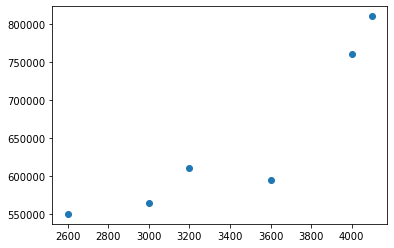

In [16]:
plt.scatter(df.area,df.price)

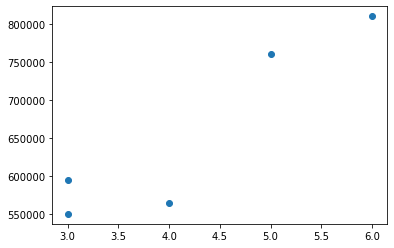

In [17]:
plt.scatter(df.bedrooms,df.price)

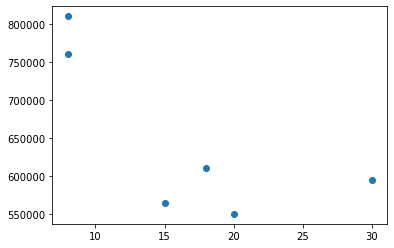

In [18]:
plt.scatter(df.age,df.price)

In [19]:
#Model Creation
from sklearn.linear_model import LinearRegression

In [20]:
LR = LinearRegression()

In [21]:
LR.fit(Xtrain,Ytrain)

LinearRegression()

In [22]:
Ypred = LR.predict(Xtest)

In [23]:
Ypred
np.set_printoptions(precision=1) #Upto two decimal

In [24]:
Ypred

array([782551.6, 614449.4])

In [25]:
Ypred-Ytest

array([22551.6,  4449.4])

In [26]:
LR.score(Xtest,Ytest)

0.953033723377219

In [27]:
np.concatenate((Ypred.reshape(len(Ypred),1),Ytest.reshape(len(Ytest),1)),1)

array([[782551.6, 760000. ],
       [614449.4, 610000. ]])

In [28]:
LR.score(X,Y)

0.9467809264813707

In [29]:
LR.score(Xtrain,Ytrain)

0.940340378949843

In [30]:
LR.score(Xtest,Ytest)

0.953033723377219

In [31]:
pickle.dump(LR,open('model.pkl','wb'))

In [32]:
model = pickle.load(open('model.pkl','rb'))